# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset


In [3]:
df = pd.read_csv('/content/Datasets/Traffic_Jams.csv')

df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [4]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


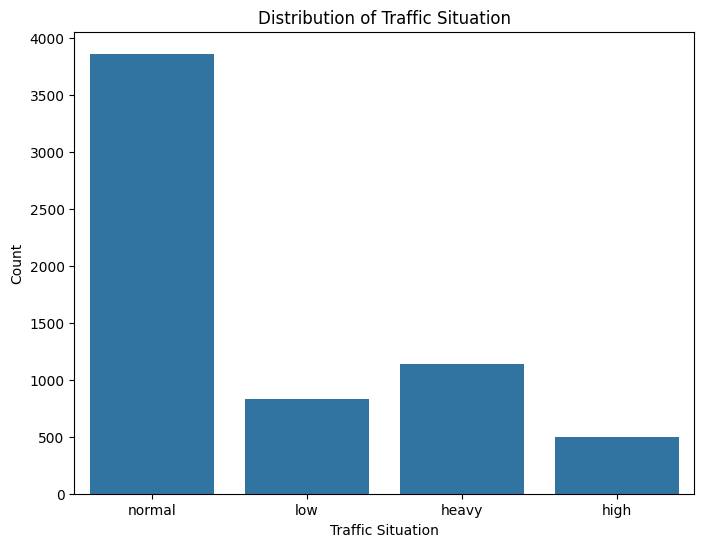

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

<ipython-input-6-04d1831c8fae>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


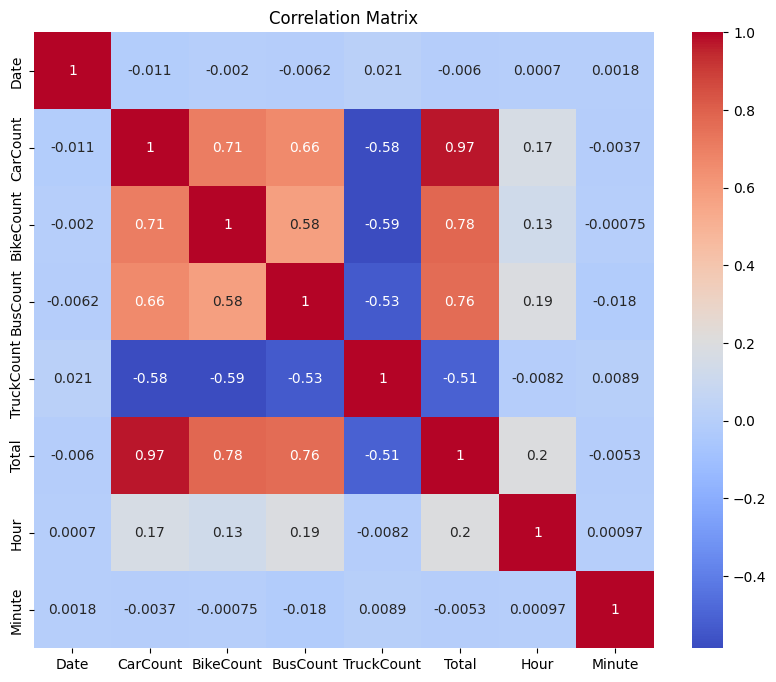

In [6]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute


numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [7]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0
Hour,0


# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

Column 'Day of the Week' not found in DataFrame.


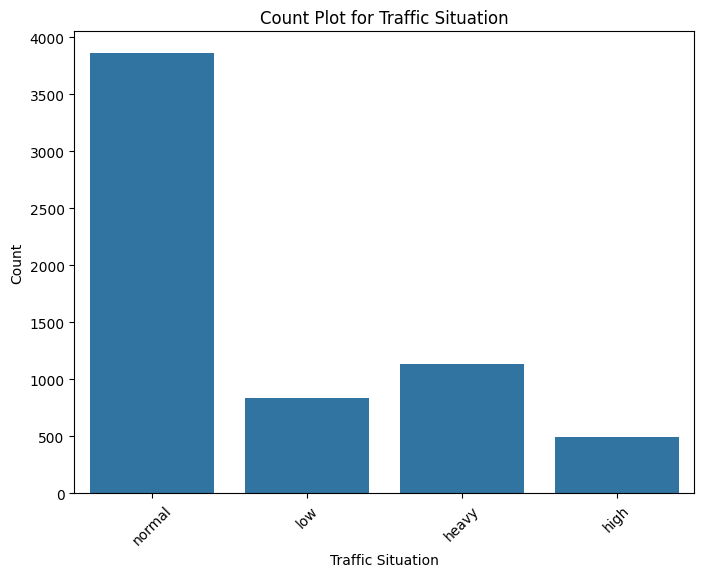

In [8]:
categorical_cols = ['Day of the Week', 'Traffic Situation']
for col in categorical_cols:

    if col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df)
        plt.title(f'Count Plot for {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Column '{col}' not found in DataFrame.")

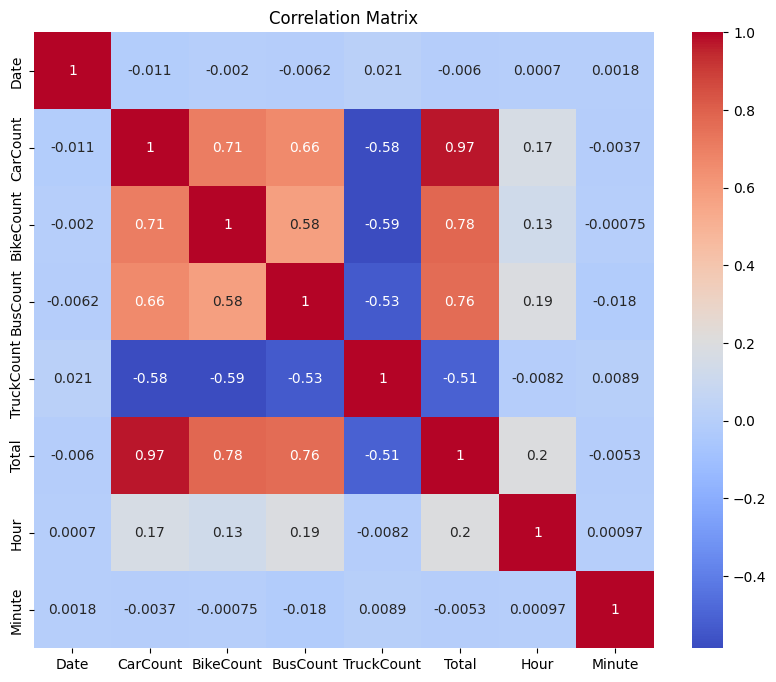

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [16]:
X = df[['Time', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']]
y = df['Traffic Situation']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [21]:
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)

bagging_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

### Evaluate the model performance

In [22]:
y_pred_bagging = bagging_clf.predict(X_test)

print("Bagging Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_bagging))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_bagging))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_bagging))

Bagging Classifier Performance:
Accuracy: 0.9019762845849802

Classification Report:
              precision    recall  f1-score   support

       heavy       1.00      1.00      1.00       220
        high       0.79      0.77      0.78       102
         low       0.70      0.81      0.75       149
      normal       0.93      0.91      0.92       794

    accuracy                           0.90      1265
   macro avg       0.86      0.87      0.86      1265
weighted avg       0.91      0.90      0.90      1265


Confusion Matrix:
[[220   0   0   0]
 [  0  79   0  23]
 [  0   0 120  29]
 [  0  21  51 722]]


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [23]:
# Initialize AdaBoostClassifier with DecisionTreeClassifier as base estimator
boosting_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)

# Train the AdaBoostClassifier
boosting_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

### Evaluate the model performance

In [24]:
y_pred_boosting = boosting_clf.predict(X_test)


print("AdaBoost Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_boosting))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_boosting))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_boosting))

AdaBoost Classifier Performance:
Accuracy: 0.9003952569169961

Classification Report:
              precision    recall  f1-score   support

       heavy       1.00      1.00      1.00       220
        high       0.80      0.77      0.79       102
         low       0.69      0.79      0.74       149
      normal       0.93      0.91      0.92       794

    accuracy                           0.90      1265
   macro avg       0.86      0.87      0.86      1265
weighted avg       0.90      0.90      0.90      1265


Confusion Matrix:
[[220   0   0   0]
 [  0  79   0  23]
 [  0   0 118  31]
 [  0  20  52 722]]


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [25]:
base_models = [
    ('bagging', bagging_clf),
    ('boosting', boosting_clf)
]

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())


stacking_clf.fit(X_train, y_train)

y_pred_stacking = stacking_clf.predict(X_test)


print("Stacking Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_stacking))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_stacking))


### Define meta-learner (LogisticRegression)

In [26]:
meta_learner = LogisticRegression()

### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [27]:
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

stacking_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

StackingClassifier(estimators=[('bagging',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                                  random_state=42)),
                               ('boosting',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                   random_state=42))],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [28]:
y_pred_stacking = stacking_clf.predict(X_test)

print("Stacking Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_stacking))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_stacking))

Stacking Classifier Performance:
Accuracy: 0.9122529644268774

Classification Report:
              precision    recall  f1-score   support

       heavy       1.00      1.00      1.00       220
        high       0.87      0.78      0.82       102
         low       0.72      0.78      0.75       149
      normal       0.93      0.93      0.93       794

    accuracy                           0.91      1265
   macro avg       0.88      0.87      0.88      1265
weighted avg       0.91      0.91      0.91      1265


Confusion Matrix:
[[220   0   0   0]
 [  0  80   0  22]
 [  0   0 116  33]
 [  0  12  44 738]]


# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

Feature Selection and Engineering

Important Features: CarCount, BikeCount, BusCount, TruckCount, Total, and Time were crucial as they directly relate to traffic volume and patterns.
Feature Engineering: Converted Time to seconds from the start of the day to capture temporal traffic patterns.
Model Selection

Chosen Methods: Used Bagging, Boosting, and Stacking to reduce overfitting and leverage diverse model strengths.
Best Model: The Stacking Classifier performed the best with 91.2% accuracy, combining the strengths of bagging and boosting.
Model Evaluation

Metrics: Used accuracy, classification report, and confusion matrix to assess performance and balance between precision and recall.